# Задание 4. Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [67]:
import numpy as np
D = np.loadtxt('lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

## 1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
X.shape

(1000, 4)

Добавляем к данным искусственные еденицы, отвечающие за свободную компоненту

In [70]:
X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))

In [87]:
X[:10]

array([[  1.   ,   9.31 , -17.043,  20.807,  11.109],
       [  1.   ,  -6.446, -12.46 , -12.941, -14.715],
       [  1.   ,  14.324,  -9.624,  29.533,   1.439],
       [  1.   , -19.511,   9.563, -38.774,  -1.116],
       [  1.   ,  -5.917,   3.696, -11.428,  13.364],
       [  1.   , -11.463,   9.371, -22.557, -17.609],
       [  1.   ,  17.629, -16.888,  33.026,  14.852],
       [  1.   ,  11.189,   7.402,  22.028, -14.745],
       [  1.   , -18.134,  12.168, -34.161,  16.041],
       [  1.   ,   2.032,  -3.884,   3.479, -16.396]])

Среднеквадратичная ошибка

In [94]:
def MSE(Y_real, Y_approx):
    return((Y_real - Y_approx)**2).mean()

Значения из линейной регрессии

In [95]:
def F_approx(X, Y, alp):
    
    # Коэффициенты
    theta = np.linalg.inv(X.T @ X + alp * np.identity(X.shape[1])) @ X.T @ Y
    # Значения
    Y_approx = theta @ X.T
    
    return Y_approx

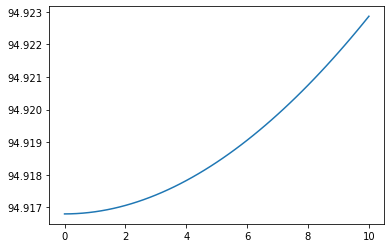

In [98]:
alphs = np.linspace(0, 10, 51)

MSEs = [ MSE(Y, F_approx(X, Y, a) ) for a in alphs ]

plt.plot(alphs, MSEs)

## 2. Подготовьте исходные данные для 5 fold CV.

In [103]:
def CrossValid(X, Y, k, Trace=False):
    
    #индексы разбиения
    inds = np.intc( np.linspace(0, X.shape[0], k + 1) )
    
    for i in range( len(inds) - 1 ):
        
        if (Trace):
            print(f"Validation indices: {inds[i]} - {inds[i+1]}.")
        
        X_train = np.vstack([ X[:inds[i]], X[inds[i+1]:] ])
        X_val = X[inds[i]:inds[i+1]]
        Y_train = np.hstack([ Y[:inds[i]], Y[inds[i+1]:] ])
        Y_val = Y[inds[i]:inds[i+1]]
        
        yield X_train, Y_train, X_val, Y_val

In [104]:
Data = CrossValid(X, Y, 5, Trace=True)

## 3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
## 4. Постройте валидационную кривую. 
## 5. Постройте кривую обучения.

Оптимальное значение параметра на обучении:  0.0
Оптимальное значение параметра на валидации:  5.0


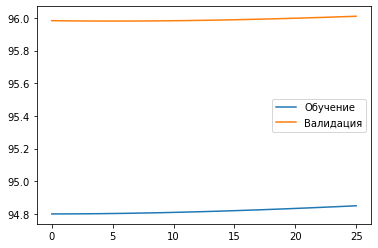

In [108]:
alphs = np.linspace(0, 25, 51)
MSEs_val = []
MSEs_train = []
k = 5

for alpha in alphas:
    mse_val = []
    mse_train = []
    
    for (X_train, Y_train, X_val, Y_val) in CrossValid(X, Y, k = k):
        
        Y_train_ = approxFunc(X_train, Y_train, alph, X_ = X_train)
        Y_val_ = approxFunc(X_train, Y_train, alph, X_ = X_val)
        
        mse_train.append( MSE(Y_train, Y_train_) )
        mse_val.append( MSE(Y_val, Y_val_) )
        
        
    MSEs_train.append(sum(mse_train)/len(mse_train))
    MSEs_val.append(sum(mse_val)/len(mse_val))
    
plt.plot(alphs, MSEs_train, label='Обучение')
plt.plot(alphs, MSEs_val, label = 'Валидация')

plt.legend()

print("Оптимальное значение параметра на обучении: ", alphs[np.argmin(MSEs_train)])
print("Оптимальное значение параметра на валидации: ", alphs[np.argmin(MSEs_val)])